# **Kütüphaneler**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Dosyayı Okuma**

In [2]:
df=pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# **Örnek Sayısını Etikete Göre Dengeli Bir Şekilde 10000 Yapımı**

In [3]:
df=df.groupby("HeartDisease").sample(n=5000, random_state=42)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 111390 to 43993
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      10000 non-null  object 
 1   BMI               10000 non-null  float64
 2   Smoking           10000 non-null  object 
 3   AlcoholDrinking   10000 non-null  object 
 4   Stroke            10000 non-null  object 
 5   PhysicalHealth    10000 non-null  float64
 6   MentalHealth      10000 non-null  float64
 7   DiffWalking       10000 non-null  object 
 8   Sex               10000 non-null  object 
 9   AgeCategory       10000 non-null  object 
 10  Race              10000 non-null  object 
 11  Diabetic          10000 non-null  object 
 12  PhysicalActivity  10000 non-null  object 
 13  GenHealth         10000 non-null  object 
 14  SleepTime         10000 non-null  float64
 15  Asthma            10000 non-null  object 
 16  KidneyDisease     10000 non-null  object

In [4]:
df=df.reset_index(drop=True)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,25.02,No,No,No,0.0,7.0,No,Female,50-54,White,No,Yes,Good,6.0,Yes,No,Yes
1,No,23.30,No,No,No,0.0,0.0,No,Female,50-54,Black,No,Yes,Good,7.0,No,No,No
2,No,25.77,Yes,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Very good,4.0,Yes,No,No
3,No,25.61,Yes,Yes,Yes,2.0,30.0,No,Female,25-29,White,Yes,No,Fair,6.0,No,No,No
4,No,31.16,Yes,No,No,0.0,0.0,Yes,Female,65-69,Black,No,Yes,Fair,7.0,No,No,No


# **Özellik Seçimi**

In [5]:
df=df[['BMI','Smoking','AlcoholDrinking','Stroke','Diabetic','AgeCategory','Sex','DiffWalking','PhysicalActivity','GenHealth','HeartDisease']]
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,Diabetic,AgeCategory,Sex,DiffWalking,PhysicalActivity,GenHealth,HeartDisease
0,25.02,No,No,No,No,50-54,Female,No,Yes,Good,No
1,23.30,No,No,No,No,50-54,Female,No,Yes,Good,No
2,25.77,Yes,No,No,No,45-49,Male,No,Yes,Very good,No
3,25.61,Yes,Yes,Yes,Yes,25-29,Female,No,No,Fair,No
4,31.16,Yes,No,No,No,65-69,Female,Yes,Yes,Fair,No


In [6]:
df=pd.get_dummies(df, columns=['Smoking', 'AlcoholDrinking', 'Stroke','Diabetic','AgeCategory','Sex','DiffWalking','PhysicalActivity','GenHealth'])
df['HeartDisease'] = df['HeartDisease'].replace({'No': 0, 'Yes': 1})
df.head()

<ipython-input-6-568e97429ecd>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HeartDisease'] = df['HeartDisease'].replace({'No': 0, 'Yes': 1})


,BMI,HeartDisease,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",...,Sex_Male,DiffWalking_No,DiffWalking_Yes,PhysicalActivity_No,PhysicalActivity_Yes,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,25.02,0,True,False,True,False,True,False,True,False,...,False,True,False,False,True,False,False,True,False,False
1,23.30,0,True,False,True,False,True,False,True,False,...,False,True,False,False,True,False,False,True,False,False
2,25.77,0,False,True,True,False,True,False,True,False,...,True,True,False,False,True,False,False,False,False,True
3,25.61,0,False,True,False,True,False,True,False,False,...,False,True,False,True,False,False,True,False,False,False
4,31.16,0,False,True,True,False,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False


In [7]:
df = df.astype({col: 'float' for col in df.select_dtypes(include=['int', 'bool']).columns})

# **BMI Sütununa Log Dönüşümü Uygulaması ve Standartizasyonu**

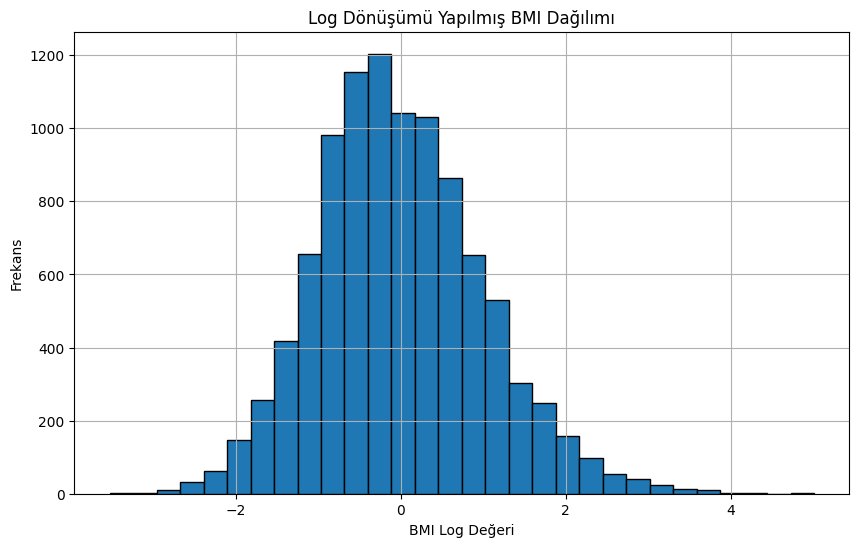

In [8]:
from sklearn.preprocessing import StandardScaler

df['BMI_log'] = np.log(df['BMI'])

scaler = StandardScaler()
df['BMI_log'] = scaler.fit_transform(df[['BMI_log']])
df = df.drop(columns=['BMI'])

plt.figure(figsize=(10, 6))
plt.hist(df['BMI_log'], bins=30, edgecolor='black')
plt.title('Log Dönüşümü Yapılmış BMI Dağılımı')
plt.xlabel('BMI Log Değeri')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

In [9]:
df.head()

,HeartDisease,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,...,DiffWalking_No,DiffWalking_Yes,PhysicalActivity_No,PhysicalActivity_Yes,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,BMI_log
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.563471
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.904681
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.421973
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.451810
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.487914


# **Dosyayı Kaydet**

In [10]:
df.to_csv("heart_final.csv", index=False)